In [8]:
#We now want to add acceptance rate and entrance rate to our data file

import pandas as pd

#Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/Florian_Wirtz_eigentlich_noch_was_mit_der.csv")

years = ['2019', '2020', '2021', '2022', '2023']

# Calculate acceptance rate and entrance rate for each year
for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    entrants_col = f'Entrances {year}'
    accept_rate_col = f'Acceptance Rate {year}'
    entrance_rate_col = f'Entrance Rate {year}'
    
    # Calculate acceptance rate: offers / applications
    df[accept_rate_col] = df[offers_col] / df[apps_col]
    
    # Calculate entrance rate: entrants / offers
    df[entrance_rate_col] = df[entrants_col] / df[offers_col]

df.to_csv("Data/MAXI.csv", index=False)

In [9]:
# Now we want to filter out the european students, in our data they are characterized by nationality
import csv

# Define the file paths, downloaded these csv files from GITHUB
eu_countries_file = "Data/EU-countries.csv"
nationalities_file = "Data/countries.csv"

# Initialize a set to store European nationalities
EU_nationalities = set()

# get EU countries from the CSV file
eu_countries = set()
with open(eu_countries_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        country_name = row[2].strip()  # country name is in first column
        eu_countries.add(country_name)

# Read the nationalities from the CSV file and filter European nationalities
with open(nationalities_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        country_name = row[3].strip()  # country name is in fourth column
        if country_name in eu_countries: 
            EU_nationalities.add(row[4])  # nationality is in fifth column
# check if all countries are there(should be 27)            
print(len(EU_nationalities))

27


In [10]:
#Now we change the CSV file with the acceptance rates so it oonly includes EU students

# Define the file paths
input_csv_file = "Data/MAXI.csv" 
output_csv_file = "Data/EU_students_acceptance_by_department.csv"  

# Open the input CSV file for reading and the output CSV file for writing
with open(input_csv_file, newline='', encoding='utf-8') as input_file, \
     open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
    # Create CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Read and write the first header row to the output file
    first_header = next(reader)
    writer.writerow(first_header)

    # Iterate over each row in the input CSV file
    for row in reader:
        # Check if the nationality in the first column is in the list of European nationalities
        if row[0].strip() in EU_nationalities:
            # Write the row to the output CSV file
            writer.writerow(row)


In [11]:
import pandas as pd

# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {'Year': [], 'Total_Applications': [], 'EU_Applications': [], 'Non-EU_Applications': [], 'Total_Acceptance_Rate': [], 'EU_Acceptance_Rate': [], 'Non-EU_Acceptance_Rate': []}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps
    
    summary_data['Year'].append(year)
    summary_data['Total_Applications'].append(total_apps)
    summary_data['EU_Applications'].append(eu_apps)
    summary_data['Non-EU_Applications'].append(non_eu_apps)
    summary_data['Total_Acceptance_Rate'].append(total_acceptance_rate)
    summary_data['EU_Acceptance_Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU_Acceptance_Rate'].append(non_eu_acceptance_rate)

summary_df = pd.DataFrame(summary_data)
summary_df


,Year,Total_Applications,EU_Applications,Non-EU_Applications,Total_Acceptance_Rate,EU_Acceptance_Rate,Non-EU_Acceptance_Rate
0,2019,49864.0,9536.0,40328.0,0.277274,0.288853,0.274536
1,2020,51341.5,9347.5,41994.0,0.304023,0.316448,0.301257
2,2021,55669.0,8628.5,47040.5,0.247903,0.269688,0.243907
3,2022,55427.5,8070.0,47357.5,0.268414,0.309727,0.261374
4,2023,55299.0,7679.0,47620.0,0.267455,0.317359,0.259408


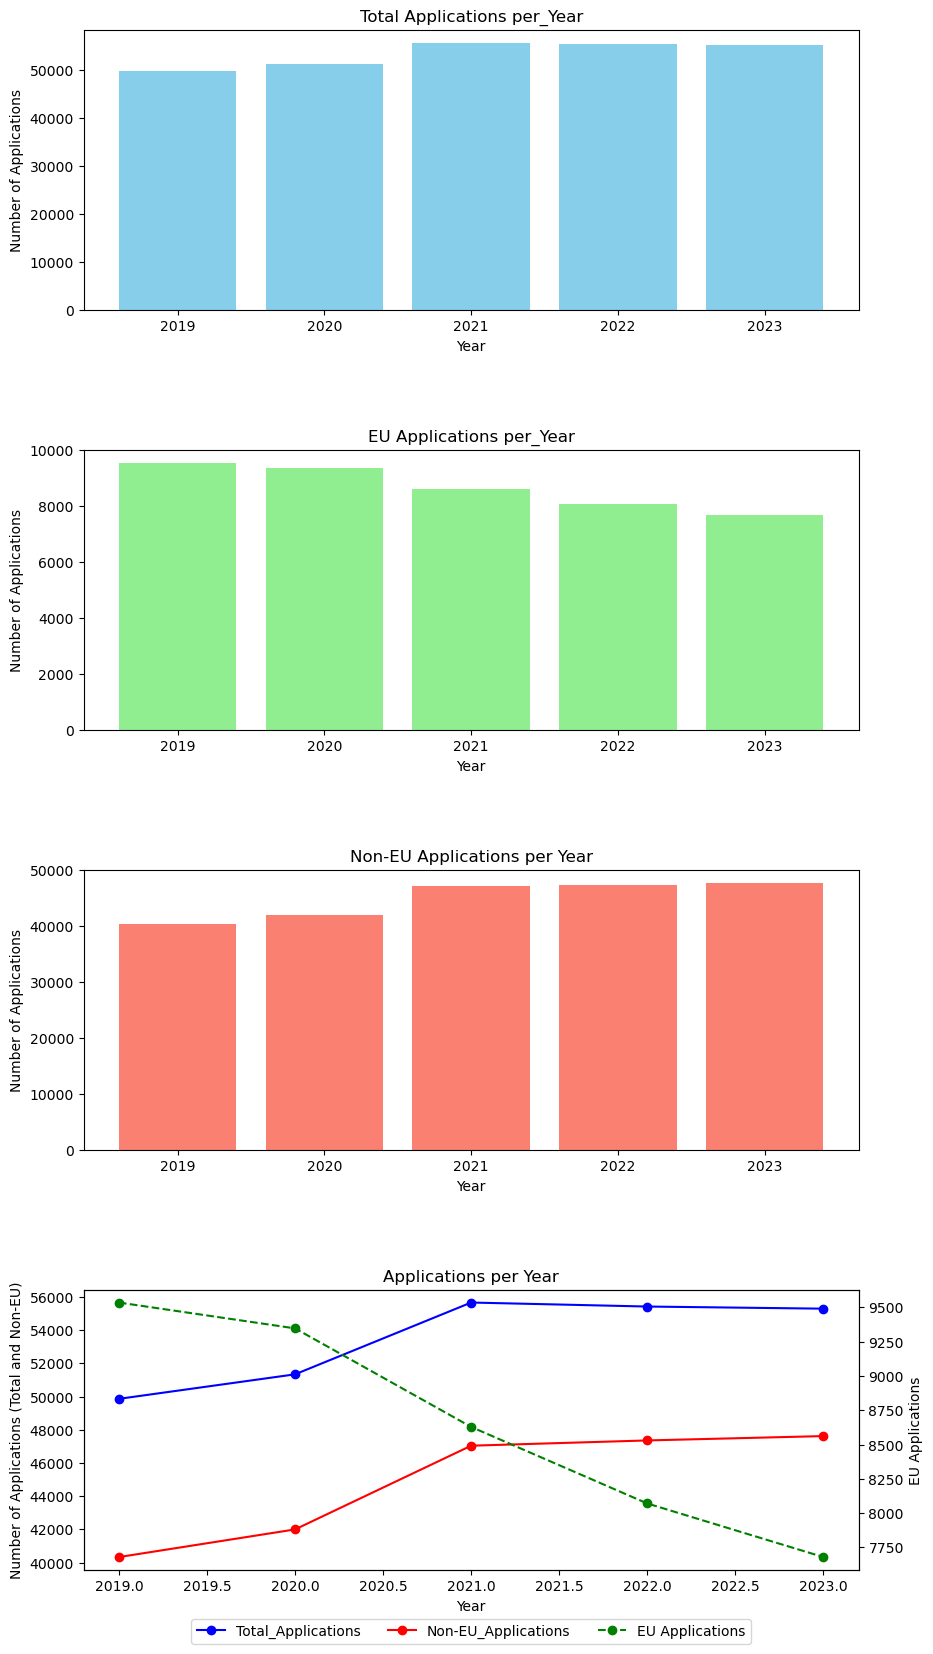

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the summary data
# We first need to calculate the summary data based on your df after filtering
years = ['2019', '2020', '2021', '2022', '2023']
summary_data = {
    "Year": [],
    "Total_Applications": [],
    "EU_Applications": [],
    "Non-EU_Applications": []
}

# Sum applications per year for EU and Total applications
for year in years:
    apps_col = f'Applications {year}'
    summary_data["Year"].append(int(year))
    summary_data["EU_Applications"].append(df[df['Nationality'].isin(EU_nationalities)][apps_col].sum())
    summary_data["Total_Applications"].append(df[apps_col].sum())
    summary_data["Non-EU_Applications"].append(df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum())

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Set up the plots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

# Plot total applications per year with a bar chart
axes[0].bar(summary_df['Year'], summary_df['Total_Applications'], color='skyblue')
axes[0].set_title('Total Applications per_Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Applications')

# Plot EU applications per year with a bar chart
axes[1].bar(summary_df['Year'], summary_df['EU_Applications'], color='lightgreen')
axes[1].set_title('EU Applications per_Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Applications')

# Plot Non-EU applications per year with a bar chart
axes[2].bar(summary_df['Year'], summary_df['Non-EU_Applications'], color='salmon')
axes[2].set_title('Non-EU Applications per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Applications')

# Add a line chart for applications per year for all categories
axes[3].plot(summary_df['Year'], summary_df['Total_Applications'], label='Total_Applications', marker='o', linestyle='-', color='blue')
axes[3].plot(summary_df['Year'], summary_df['Non-EU_Applications'], label='Non-EU_Applications', marker='o', linestyle='-', color='red')

# EU uses the secondary y-axis
ax2 = axes[3].twinx()
ax2.plot(summary_df['Year'], summary_df['EU_Applications'], label='EU Applications', marker='o', linestyle='--', color='green')
ax2.set_ylabel('EU Applications')

axes[3].set_title('Applications per Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Number of Applications (Total and Non-EU)')

# Handling the legend: combining legends from both axes and placing them optimally
lines, labels = axes[3].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()


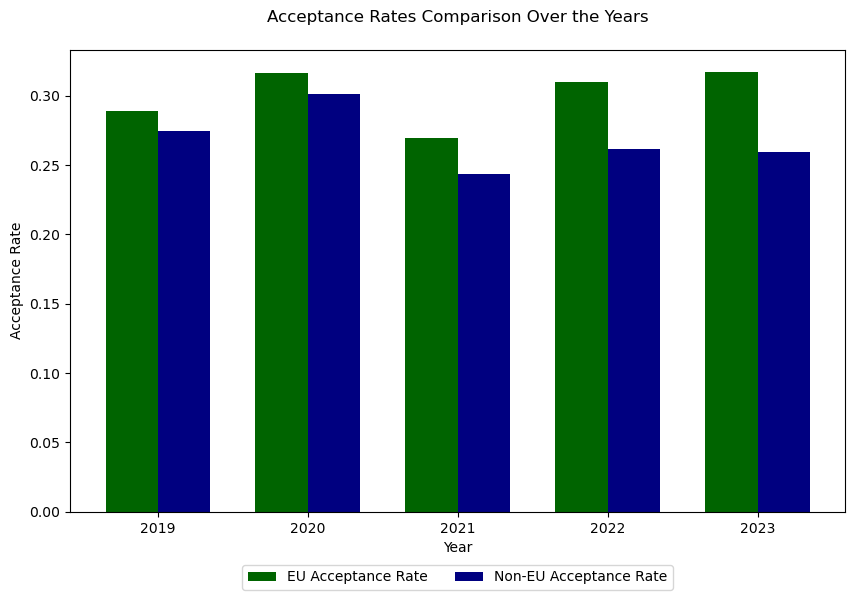

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# First, ensure that the acceptance rates are added to the summary_df DataFrame
# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {
    'Year': [],
    'Total_Applications': [],
    'EU_Applications': [],
    'Non-EU_Applications': [],
    'Total_Acceptance_Rate': [],
    'EU_Acceptance_Rate': [],
    'Non-EU_Acceptance_Rate': []
}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps if eu_apps > 0 else 0  # Prevent division by zero
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps if non_eu_apps > 0 else 0  # Prevent division by zero
    
    summary_data['Year'].append(year)
    summary_data['Total_Applications'].append(total_apps)
    summary_data['EU_Applications'].append(eu_apps)
    summary_data['Non-EU_Applications'].append(non_eu_apps)
    summary_data['Total_Acceptance_Rate'].append(total_acceptance_rate)
    summary_data['EU_Acceptance_Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU_Acceptance_Rate'].append(non_eu_acceptance_rate)

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Now plot the acceptance rates
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # bar width
x = np.arange(len(years))  # the label locations

# Plotting the bars for EU and Non-EU acceptance rates
ax.bar(x - width/2, summary_df['EU_Acceptance_Rate'], width, label='EU Acceptance Rate', color='darkgreen')
ax.bar(x + width/2, summary_df['Non-EU_Acceptance_Rate'], width, label='Non-EU Acceptance Rate', color='navy')

ax.set_xlabel('Year')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates Comparison Over the Years', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Year'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()


                            OLS Regression Results                            
Dep. Variable:        EU_Applications   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     67.12
Date:                Wed, 24 Apr 2024   Prob (F-statistic):             0.0147
Time:                        22:50:59   Log-Likelihood:                -29.398
No. Observations:                   5   AIC:                             64.80
Df Residuals:                       2   BIC:                             63.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8815.5000    161.914     54.446      

/Users/timgrutimner/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


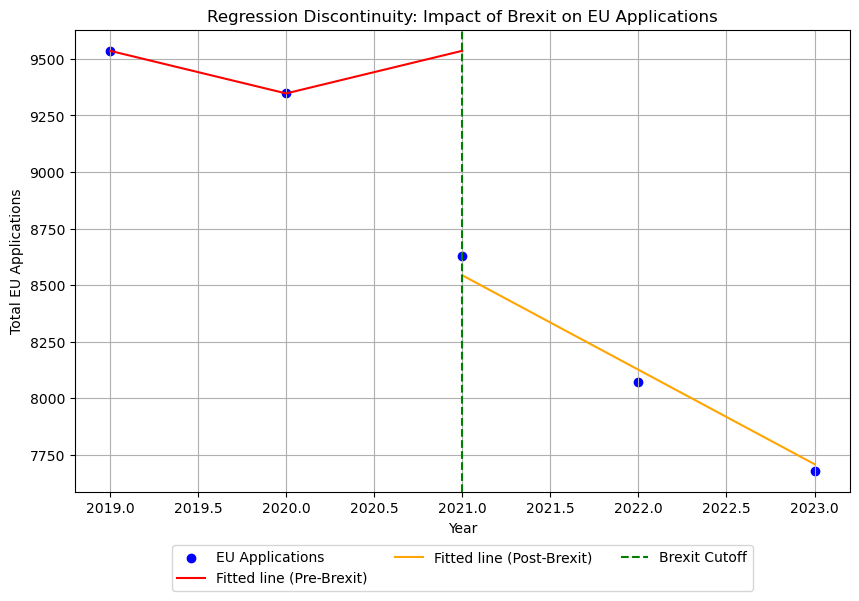

In [15]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming summary_df is already defined and contains 'Year' and 'EU_Applications'
# The DataFrame should be sorted by 'Year' to ensure the plot lines connect points in the correct order
summary_df = summary_df.sort_values('Year')

# Set up the data for Regression Discontinuity
summary_df['Time'] = summary_df['Year'] - 2021
summary_df['Post_Brexit'] = (summary_df['Year'] > 2020).astype(int)

# Define the regression formula for RDD
formula = 'EU_Applications ~ Time + Post_Brexit'

# Fit the pre-Brexit model
pre_brexit = summary_df[summary_df['Year'] <= 2020]
pre_brexit_model = smf.ols(formula, data=pre_brexit).fit()

# Calculate the slope and intercept of the pre-Brexit OLS line
slope = pre_brexit_model.params['Time']
intercept = pre_brexit_model.params['Intercept']

# Predict EU Applications for the cutoff year using the pre-Brexit model
predicted_cutoff = slope * 2021 + intercept

# Create a DataFrame with the cutoff year and the predicted value
cutoff_df = pd.DataFrame({'Year': [2021], 'EU_Applications': [predicted_cutoff]})

# Extend the pre-Brexit line to the cutoff point
pre_brexit_extended = pd.concat([pre_brexit, cutoff_df])

# Fit the regression discontinuity model
rdd_model = smf.ols(formula, data=summary_df).fit()

# Print the results to get the p-value
print(rdd_model.summary())

# Explicitly print the p-value for the Post_Brexit effect
p_value = rdd_model.pvalues['Post_Brexit']
print(f"The p-value for the Post_Brexit effect is: {p_value:.4f}")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Year'], summary_df['EU_Applications'], color='blue', label='EU Applications')

# Add the fitted lines for pre- and post-Brexit using the full model
post_brexit = summary_df[summary_df['Year'] > 2020]
plt.plot(pre_brexit_extended['Year'], pre_brexit_model.predict(pre_brexit_extended), color='red', label='Fitted line (Pre-Brexit)')
plt.plot(post_brexit['Year'], rdd_model.predict(post_brexit), color='orange', label='Fitted line (Post-Brexit)')

# Add the Brexit cutoff line
plt.axvline(x=2021, color='green', linestyle='--', label='Brexit Cutoff')

# Set the title and labels
plt.title('Regression Discontinuity: Impact of Brexit on EU Applications')
plt.xlabel('Year')
plt.ylabel('Total EU Applications')

# Adjust legend to prevent overlap
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.grid(True)
plt.show()

